<a href="https://colab.research.google.com/github/Adnunes/formacao_data_science_alura/blob/main/Introdu%C3%A7%C3%A3o_a_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Science: dados e visualizações

In [1]:
import pandas as pd

notas = pd.read_csv("ratings.csv")

notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [2]:
notas.shape

(100836, 4)

# 1.1 Explorando as notas

In [3]:
notas.columns = ["usuarioID", "filmeId", "nota", "momento"]
notas.head()

,usuarioID,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
notas["nota"].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [5]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [6]:
notas['nota'].mean()

3.501556983616962

In [7]:
notas.nota

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

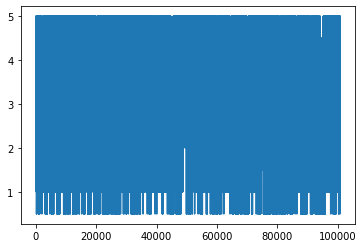

In [8]:
notas.nota.plot()

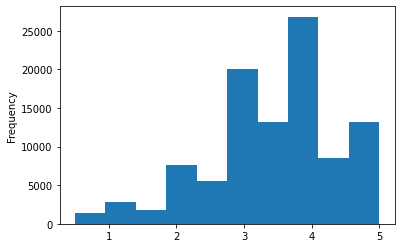

In [9]:
notas.nota.plot(kind='hist')

In [10]:
print(f'mediana: {notas.nota.median():.2f}')
print(f'media: {notas.nota.mean():.2f}')


mediana: 3.50
media: 3.50


# 1.2 .decribe() em notas




In [11]:
notas.nota.describe() #descrição dos Daodos


count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


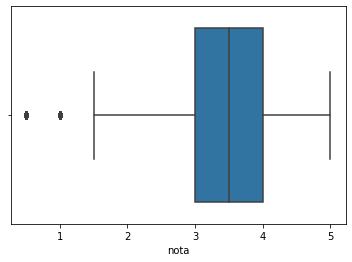

In [12]:
import seaborn as sns

sns.boxplot(notas.nota) # é uma forma grafica unir o plot do pandas com o describe

# 2. Análise Exploratória

#2.1 Explorando Filmes

In [13]:
filmes = pd.read_csv('movies.csv')
filmes.columns = ["filmeId","titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
notas.head()

,usuarioID,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#2.2 Analisando notas específicas por filme

In [15]:
notas.query("filmeId == 1").nota.mean()

3.9209302325581397

In [16]:
notas.query("filmeId == 2").nota.mean()

3.4318181818181817

In [17]:
notas.groupby("filmeId").mean()


,usuarioID,nota,momento
filmeId,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


In [18]:
medias_por_filme = notas.groupby('filmeId').mean()['nota']
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

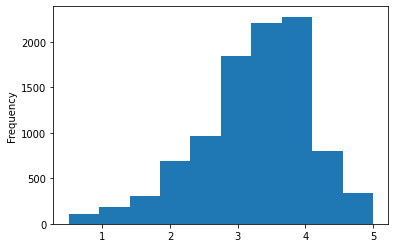

In [19]:
medias_por_filme.plot(kind='hist')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

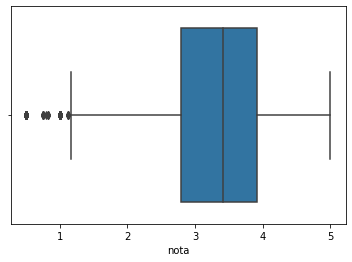

In [20]:
sns.boxplot(medias_por_filme)
medias_por_filme.describe()

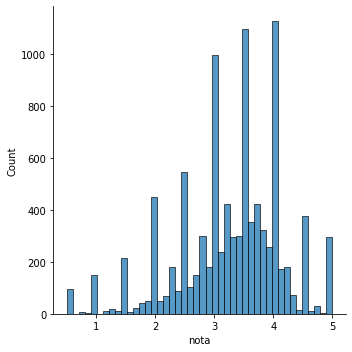

In [21]:
sns.displot(medias_por_filme)

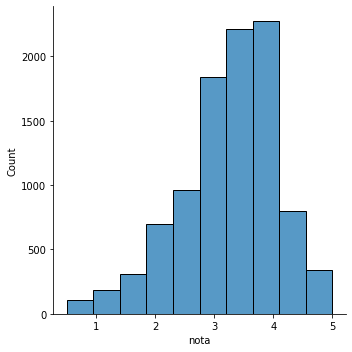

In [22]:
sns.displot(medias_por_filme, bins =10)

Text(0.5, 1.0, 'Histograma das Medias dos Filme')

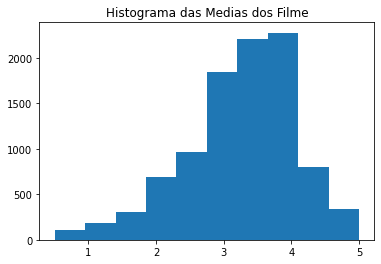

In [23]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filme)
plt.title("Histograma das Medias dos Filme")

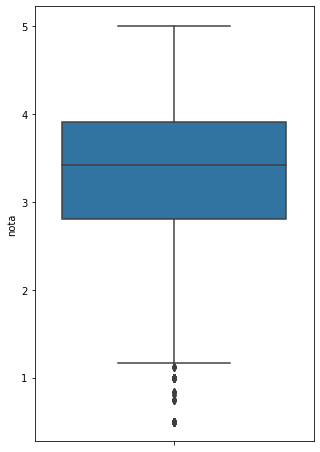

In [24]:
plt.figure(figsize=(5,8))
sns.boxplot(y=medias_por_filme)


# 3. Variáveis

# 3.1 Tipos de variáveis

In [25]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')

In [26]:
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


# 3.2  Variável Categórica (qualitativa)

As variáveis categóricas são aquelas que não possuem valores quantitativos, mas, ao contrário, são definidas por várias categorias, ou seja, representam uma classificação dos indivíduos. Podem ser nominais ou ordinais.

# 3.2.1 Nominal

Não existe ordenação dentre as categorias. Exemplos: sexo, cor dos olhos, fumante/não fumante, doente/sadio.

In [27]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [28]:
tmdb.original_language

0       en
1       en
2       en
3       en
4       en
        ..
4798    es
4799    en
4800    en
4801    en
4802    en
Name: original_language, Length: 4803, dtype: object

In [29]:
contagem_de_linguas = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_linguas.columns = ["original_language", "total"]
contagem_de_linguas.head()


,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


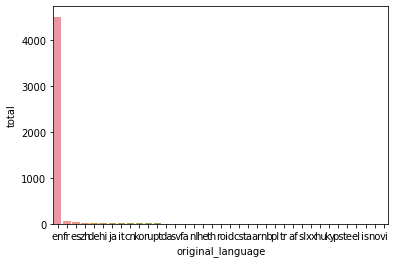

In [30]:
sns.barplot(x = "original_language", y="total",data = contagem_de_linguas)

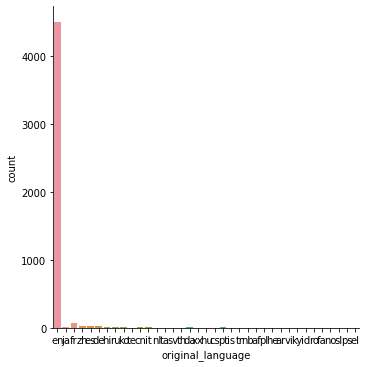

In [31]:
sns.catplot(x="original_language", kind = "count", data = tmdb)

([<matplotlib.patches.Wedge at 0x7f6bf5796f10>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ko'),
  Text(1.0960865535188649, -0.09270527058984593, 'ru'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'fa'),
  Text(1.0990363161210686, -0.04603450713357274, 'nl'),
  Text(1.0992355702663055, -0.04100196411527794, 'he'),
  Text

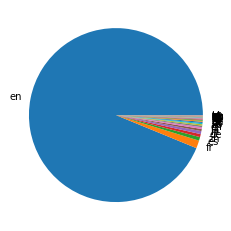

In [32]:
plt.pie(contagem_de_linguas.total, labels = contagem_de_linguas.original_language)

quase nunca é recomendado grafico de pizza, dificil leitura 

In [33]:
total_por_lingua = tmdb.original_language.value_counts()
total_por_lingua

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
fa       4
nl       4
he       3
th       3
ro       2
id       2
cs       2
ta       2
ar       2
nb       1
pl       1
tr       1
af       1
sl       1
xx       1
hu       1
ky       1
ps       1
te       1
el       1
is       1
no       1
vi       1
Name: original_language, dtype: int64

In [34]:
total_em_ingles = total_por_lingua.loc['en']
total_geral = total_por_lingua.sum()
total_em_ingles
total_outras_linguas = total_geral - total_em_ingles


In [35]:
total_geral

4803

In [36]:
total_outras_linguas

298

In [37]:
dados = {
    'lingua': ['ingles', 'outros'],
    'total': [total_em_ingles,total_outras_linguas]
}
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


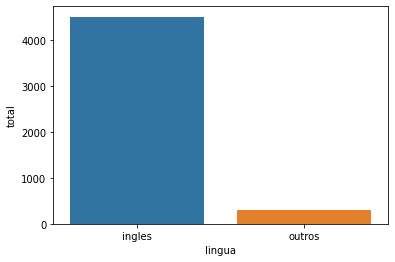

In [38]:
sns.barplot(x='lingua', y='total', data = dados)

In [43]:
tmdb.query("original_language != 'en'").original_language.value_counts()


fr    70
es    32
de    27
zh    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
id     2
ta     2
ar     2
cs     2
ro     2
te     1
ky     1
is     1
sl     1
hu     1
af     1
nb     1
xx     1
no     1
pl     1
ps     1
tr     1
el     1
vi     1
Name: original_language, dtype: int64

# 3.2.2 Ordinal

Quando estamos trabalhando com categorias ordinais, existe uma ordenação entre as categorias. Por exemplo: escolaridade (primeiro, segundo e terceiro graus), estágios de uma doença (inicial, intermediário, terminal), mês de observação (janeiro, fevereiro, ..., dezembro), etc.

# 3.3 Variável Quantitativa

# 3.3.1 Discreta


Cacterísticas mensuráveis que podem assumir apenas um número finito ou infinito contável de valores e, assim, somente fazem sentido valores inteiros. Geralmente são o resultado de contagens. Exemplos: número de filhos, número de bactérias por litro de leite, número de cigarros fumados por dia.

# 3.3.2 Contínua



Características mensuráveis que assumem valores em uma escala contínua (na reta real), para as quais valores fracionais fazem sentido. Usualmente devem ser medidas através de algum instrumento. Exemplos: peso (balança), altura (régua), tempo (relógio), pressão arterial, idade.

# 4. Visualização 

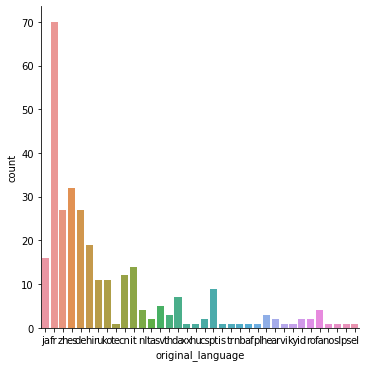

In [47]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
sns.catplot(x='original_language', kind="count", data=filmes_sem_lingua_original_em_ingles)

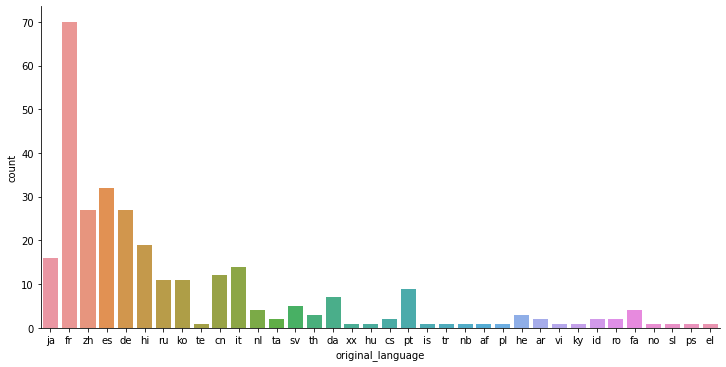

In [49]:
sns.catplot(x='original_language', kind="count", data=filmes_sem_lingua_original_em_ingles, aspect=2)

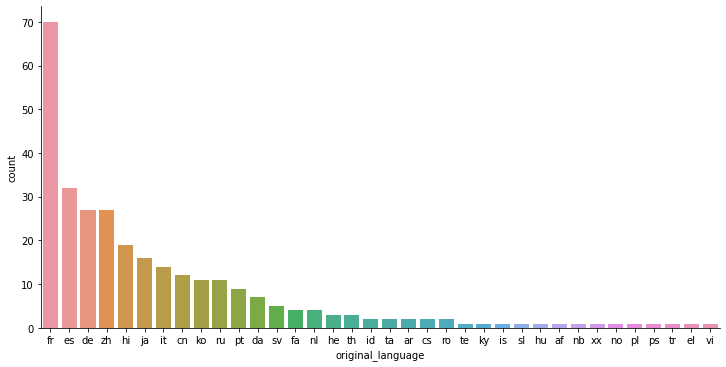

In [50]:
sns.catplot(x='original_language', kind="count", data=filmes_sem_lingua_original_em_ingles, aspect=2, order = total_por_lingua_de_outros_filmes.index)

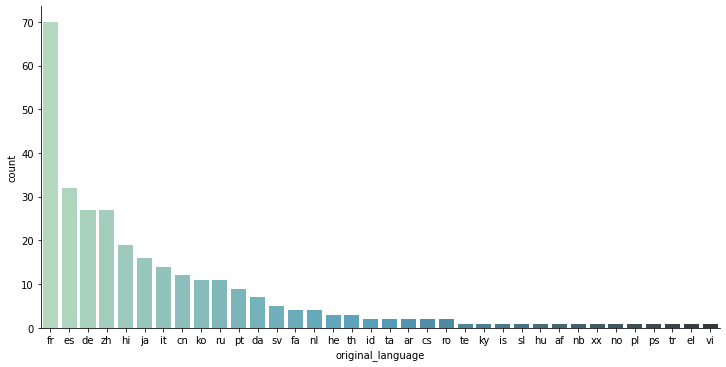

In [53]:
sns.catplot(x='original_language', kind="count", data=filmes_sem_lingua_original_em_ingles, aspect=2,order = total_por_lingua_de_outros_filmes.index, palette="GnBu_d")

# 5. Dados e Estatística

In [54]:
filmes.head()


,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [55]:
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [67]:
notas_do_toy_story = notas.query("filmeId==1")
notas_do_jumanji = notas.query('filmeId==2')
print(len(notas_do_toy_story), len(notas_do_jumanji))

215 110


In [68]:
print(f'Nota Media do Toy Stotry: {notas_do_toy_story.nota.mean():.2f}')
print(f'Nota Media do Jumanji: {notas_do_jumanji.nota.mean():.2f}')

Nota Media do Toy Stotry: 3.92


In [70]:
print(f'Nota Mediana do Toy Stotry: {notas_do_toy_story.nota.median():.2f}')
print(f'Nota Mediana do Jumanji: {notas_do_jumanji.nota.median():.2f}')

Nota Mediana do Toy Stotry: 4.00
Nota Mediana do Jumanji: 3.50


In [77]:
import numpy as np


filme1 = np.append(np.array([2.5]*10),np.array([3.5]*10))
filme2 = np.append(np.array([5]*10),np.array([1]*10))

print(filme1.mean(), filme2.mean())
print(np.median(filme1), np.median(filme2))

3.0 3.0
3.0 3.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


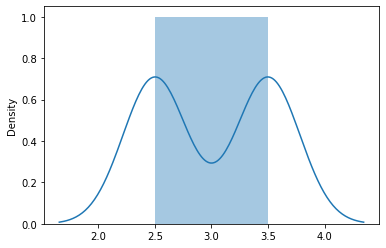

In [78]:
sns.distplot(filme1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


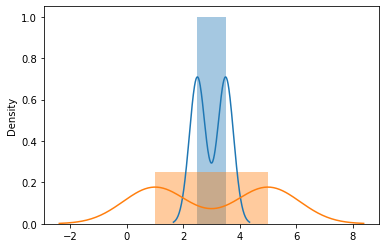

In [79]:
sns.distplot(filme1)
sns.distplot(filme2)

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

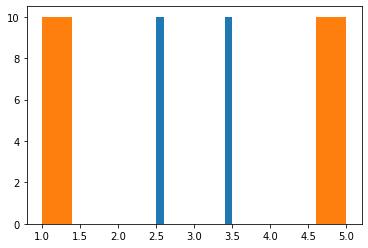

In [86]:
plt.hist(filme1)
plt.hist(filme2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


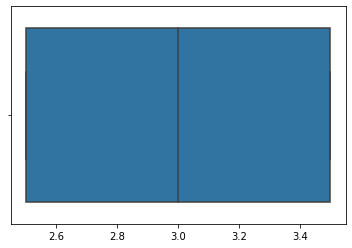

In [81]:
sns.boxplot(filme1)

{'boxes': [<matplotlib.lines.Line2D at 0x7f6befb58ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6befb5ea50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6befb66a90>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6befb66550>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6befb58f90>,
  <matplotlib.lines.Line2D at 0x7f6befb6ea50>]}

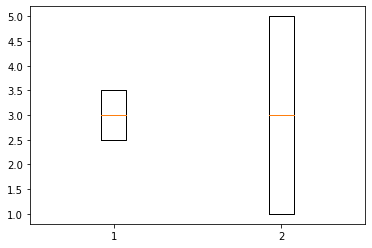

In [83]:
plt.boxplot([filme1, filme2])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


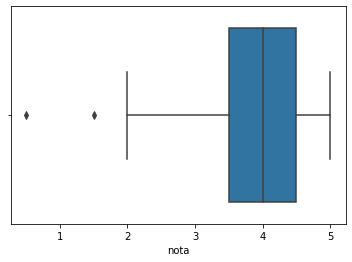

In [88]:
sns.boxplot(notas_do_toy_story.nota)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


{'boxes': [<matplotlib.lines.Line2D at 0x7f6beccee890>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6beccf7050>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6becce4690>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6becce47d0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6beccf7590>,
  <matplotlib.lines.Line2D at 0x7f6becc9f190>]}

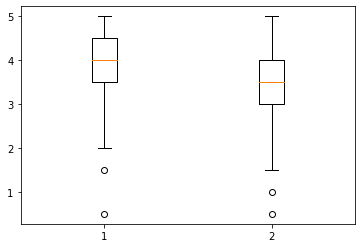

In [89]:
plt.boxplot([notas_do_toy_story.nota, notas_do_jumanji.nota])

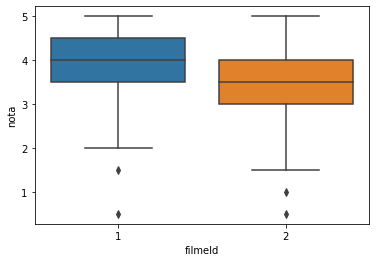

In [91]:
sns.boxplot(x="filmeId", y="nota", data = notas.query("filmeId in [1,2]"))

In [100]:
desvio_padrao_jumanji = notas_do_jumanji.nota.std()
desvio_padrao_toy_story = notas_do_toy_story.nota.std()

print(f'Desvio padrão Jumanji : {desvio_padrao_jumanji:.2f} \nDesvio padrão Toy Story: {desvio_padrao_toy_story:.2f}')

Desvio padrão Jumanji : 0.88 
Desvio padrão Toy Story: 0.83
